n_sample =  16
xy_odd.shape =  (8, 2)
xy_even.shape =  (8, 2)


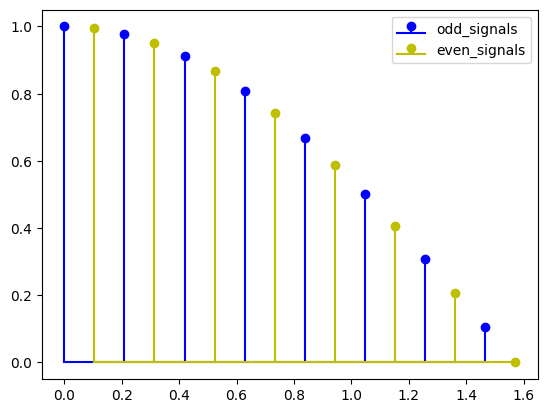

In [2]:
import matplotlib.pyplot as plt
import numpy as np

n_sample = 2**4
print('n_sample = ', n_sample)
theta = np.linspace(0, np.pi / 2, num=n_sample)
xs = np.cos(theta)
ys = np.sin(theta)

theta_odd = theta[0::2]
x_odd = xs[0::2]
y_odd = ys[0::2]
xy_odd = np.hstack([x_odd.reshape(-1,1), y_odd.reshape(-1,1)])

theta_even = theta[1::2]
x_even = xs[1::2]
y_even = ys[1::2]
xy_even = np.hstack([x_even.reshape(-1, 1), y_even.reshape(-1,1)])

print('xy_odd.shape = ', xy_odd.shape)
print('xy_even.shape = ', xy_even.shape)


plt.stem(theta_odd, x_odd, linefmt='b-', basefmt='b-', label='odd_signals')
plt.stem(theta_even, x_even, linefmt='y-', basefmt='y-', label='even_signals')
plt.legend()
plt.show()



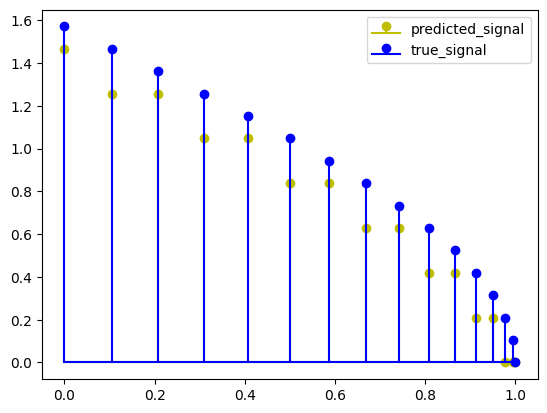

In [10]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()

tree_model.fit(x_even.reshape(-1,1), theta_odd)
theta_pred = tree_model.predict(xs.reshape(-1,1))

plt.stem(xs, theta_pred, linefmt='y-', basefmt='y-', label='predicted_signal')
plt.stem(xs, theta, linefmt='b-', basefmt='b-', label='true_signal')
plt.legend()
plt.show()


### Conclusion
- Decision Tree doesn't necessarily memorize Regression Points.